# Práctico Análisis y Visualización de Datos 


**Objetivo y alcance:**

Se introducirá la miscelánea disponible para la inspección y visualización de la estadística descriptiva, estadística inferencial y probabilidad conjunta para cada una de las variables físicas de las galaxias, herramientas suficientes para determinar la distribución y estadisticos de las cantidades físicas que caracterizan al dataset y como éstas están relacionadas.

**Método:**
El objetivo será hecho a través de las librerías de python dedicadas a la examinación y visualización, principalmente con librerías como: pandas, numpy, seaborn, matplotlib y scipy. En la parte estadística se estudiarán los intercuartiles, valores extremos, *outliers* y las distribuciones que sigue cada una de las variables ajustadas a la distribución normal, las mismas tambien se visualizarán a través de histogramas y boxplots.  Usando métodos probabilisticos como el teorema de Bayes, chi-cuadrado y el intervalo de confianza de la mediana en los boxplots se verá la correlación entre estas variables.


Estructura del informe:
- Presentación de los datos;
- Visualización de datos categóricos y numéricos;
- Valores explícitos característicos de la distribución de algunas de las variables;
- Vizualización de la distribución con los valores característicos de la misma;
- Ajuste de la distribución a una Normal;
- Examinación de distribuciones de probabilidades discretas y continuas;
- Correlación entre las variables;
- Visualización de correlación entre variables usando mapas de calor;
- Conclusiones.

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches


# Carga de Datos

In [104]:
data = pd.read_csv('galaxias.csv', sep=',')

In [105]:
display('Head',data.head(4))
display('Tamaño',data.shape)
display('Valores faltantes',data.notnull().all().to_frame())
display('Estadísticos del dataset',data.describe())

'Head'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


'Tamaño'

(92102, 13)

'Valores faltantes'

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


'Estadísticos del dataset'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209298,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [106]:
clase=[]
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(2)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S


# Funciones

In [ ]:
def probabilidad_column(data,column):
    df_column = data[data[column]]
    cantidad_column = len(df_column)
    cantidad_total = len(data)
    return (( cantidad_tipo_galaxia / cantidad_total ) * 100)

In [53]:
def probabilidad_galaxia(data,tipo_galaxia):
    df_tipo_galaxia = data[data[tipo_galaxia] == 1]
    cantidad_tipo_galaxia = len(df_tipo_galaxia)
    cantidad_total = len(data)
    return (( cantidad_tipo_galaxia / cantidad_total ) * 100)

In [60]:
def contar_galaxias(data):
    galaxias_irregulares = data[data.clase == "I"]
    galaxias_espirales = data[data.clase == "S"]
    galaxias_elipticas = data[data.clase == "E"]
    len_galaxias_irregulares = len(galaxias_irregulares.clase)
    len_galaxias_espirales = len(galaxias_espirales.clase)
    len_galaxias_elipticas = len(galaxias_elipticas.clase)
    print("Cantidad galaxias irregulares: " + str(len_galaxias_irregulares))
    prob_irregulares = probabilidad_galaxia(data,'irregular')
    print("Probabilidad galaxias irregulares: % " + str(prob_irregulares))
    print("Cantidad galaxias espirales: " + str(len_galaxias_espirales))
    prob_espirales = probabilidad_galaxia(data,'espiral')
    print("Probabilidad galaxias espirales: % " + str(prob_espirales))
    print("Cantidad galaxias elípticas: " + str(len_galaxias_elipticas))
    prob_elipticas = probabilidad_galaxia(data,'eliptica')
    print("Probabilidad galaxias elípticas: % " + str(prob_elipticas))
    print("Cantidad total de galaxias: " + str(len_galaxias_irregulares+len_galaxias_espirales+len_galaxias_elipticas))

In [166]:
def describe_min_column(data,column):
    with_error_condition = data[data[column] == data[column].min()]
    without_error_condition = data[data[column] > data[column].min()]
    with_error = with_error_condition.count()[column]
    print("Columna " + column + ": Hay " + str(with_error) + " con valor mínimo " + str(data[column].min()))
    print("Columna " + column + ": Hay " + str(without_error_condition.count()[column]) + " sin valor mínimo " + str(data[column].min()))

In [239]:
def calcular_estadistico(data,column):
    return (
        (data[column] - data[column].mean())
        /
        (data[column].std() / np.square(len(data[column])))
    )

# Visualización

Encuentre una forma adecuada para exhibir el balance de las clase eliptica (E), espiral (S) e irregular (I) usando la nueva columna clase.

Cantidad galaxias irregulares: 53799
Probabilidad galaxias irregulares: % 58.41241232546525
Cantidad galaxias espirales: 30046
Probabilidad galaxias espirales: % 32.62252719810645
Cantidad galaxias elípticas: 8257
Probabilidad galaxias elípticas: % 8.965060476428308
Cantidad total de galaxias: 92102


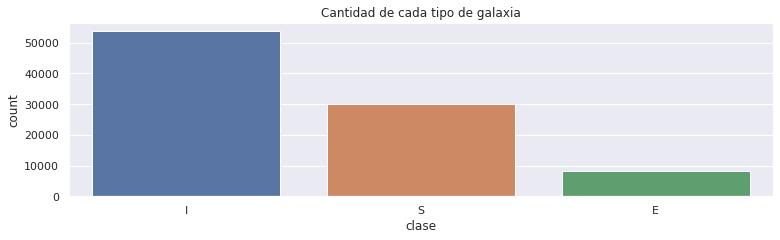

In [210]:
contar_galaxias(data)
seaborn.set_theme(style="darkgrid")
seaborn.countplot(x="clase", data=data)
plt.title("Cantidad de cada tipo de galaxia")
plt.show()

<AxesSubplot:xlabel='z'>

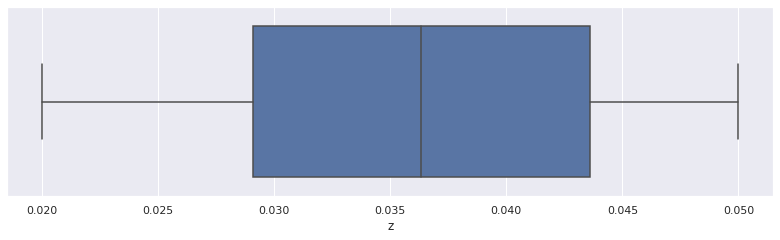

In [273]:
seaborn.boxplot(data=data, x="z")

<AxesSubplot:xlabel='z', ylabel='clase'>

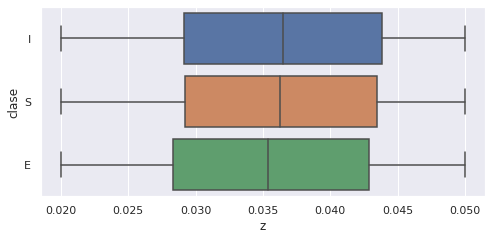

In [282]:
seaborn.boxplot(data=data, x="z", y="clase")

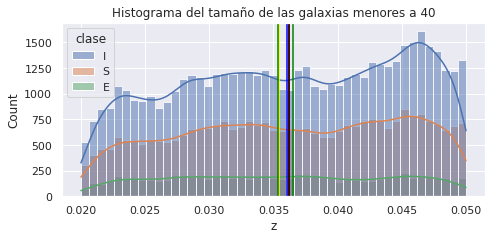

In [281]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data=data[['z','clase']], kde=True, x="z", hue="clase")
plt.axvline(data[data.clase == "I"].z.mean(), color='red')
plt.axvline(data[data.clase == "I"].z.median(), color='green')

plt.axvline(data[data.clase == "S"].z.mean(), color='blue')
plt.axvline(data[data.clase == "S"].z.median(), color='black')

plt.axvline(data[data.clase == "E"].z.mean(), color='yellow')
plt.axvline(data[data.clase == "E"].z.median(), color='green')
plt.title("Histograma del tamaño de las galaxias")
#ax.lines[0].remove()
plt.show()

In [287]:
data[data.clase == "I"].z

0        0.042512
3        0.045485
7        0.043900
8        0.047060
10       0.044842
           ...   
92095    0.044184
92097    0.031076
92098    0.024916
92099    0.047463
92100    0.027961
Name: z, Length: 53799, dtype: float64

In [288]:
data[data.clase == "S"].z

1        0.049901
2        0.045041
4        0.035336
5        0.044426
6        0.030671
           ...   
92077    0.035687
92081    0.046999
92087    0.047998
92096    0.049514
92101    0.042949
Name: z, Length: 30046, dtype: float64

In [289]:
data[data.clase == "E"].z

11       0.030755
43       0.031193
48       0.027357
50       0.030502
51       0.033159
           ...   
92009    0.048176
92010    0.032941
92021    0.029269
92031    0.045689
92090    0.039086
Name: z, Length: 8257, dtype: float64

In [ ]:
seaborn.boxplot(data=data, x="z", y="clase")

<AxesSubplot:xlabel='R'>

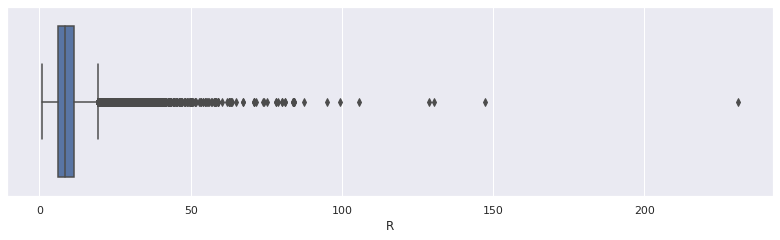

In [274]:
seaborn.boxplot(data=data, x="R")

#### Análisis variable frecuencia fracción de luz ("Mag_u", "Mag_g", "Mag_r", "Mag_i","Mag_z","color")

In [151]:
data.groupby("clase")[["ra", "dec", "Mag_u", "Mag_g", "Mag_r", "Mag_i","Mag_z","color","z","R"]].min()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,color,z,R
clase,,,,,,,,,,
E,0.166083,-11.157700,14.66661,12.59101,11.71873,11.28783,10.97839,-12.06477,0.020001,1.423474
I,0.008745,-11.178372,-9999.00000,-9999.00000,11.52409,11.22058,-9999.00000,-13.48457,0.020002,0.842248
S,0.019187,-11.202394,14.58281,13.04790,12.18604,11.77454,-9999.00000,-13.25630,0.020001,1.290469


In [167]:
describe_min_column(data,'Mag_u')
describe_min_column(data,'Mag_g')
describe_min_column(data,'Mag_z')

Columna Mag_u: Hay 2 con valor mínimo -9999.0
Columna Mag_u: Hay 92100 sin valor mínimo -9999.0
Columna Mag_g: Hay 2 con valor mínimo -9999.0
Columna Mag_g: Hay 92100 sin valor mínimo -9999.0
Columna Mag_z: Hay 3 con valor mínimo -9999.0
Columna Mag_z: Hay 92099 sin valor mínimo -9999.0


In [214]:
# Filtro las galaxias con valores mayores al mínimo
galaxias_filtered = data.copy()
galaxias = data.copy()
galaxias_filtered = df_filtered_min[df_filtered_min.Mag_u > df_filtered_min.Mag_u.min()]
galaxias_filtered = df_filtered_min[df_filtered_min.Mag_g > df_filtered_min.Mag_g.min()]
galaxias_filtered = df_filtered_min[df_filtered_min.Mag_z > df_filtered_min.Mag_z.min()]

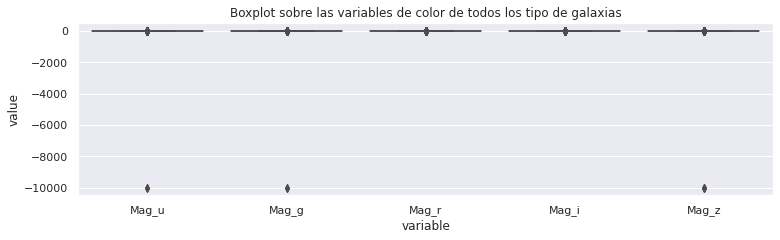

In [215]:
df = pd.DataFrame(data=galaxias, columns=["Mag_u", "Mag_g", "Mag_r", "Mag_i","Mag_z"])
seaborn.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("Boxplot sobre las variables de color de todos los tipo de galaxias")
plt.show()

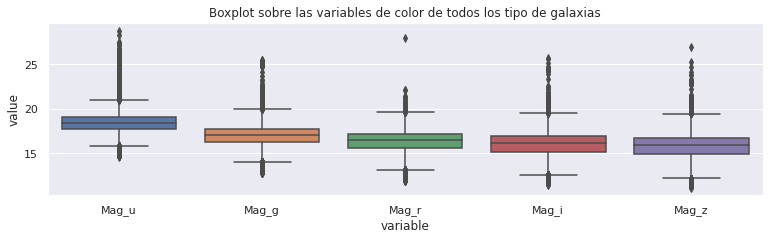

In [217]:
df_filtered = pd.DataFrame(data=galaxias_filtered, columns=["Mag_u", "Mag_g", "Mag_r", "Mag_i","Mag_z"])
seaborn.boxplot(x="variable", y="value", data=pd.melt(df_filtered))
plt.title("Boxplot sobre las variables de color de todos los tipo de galaxias")
plt.show()

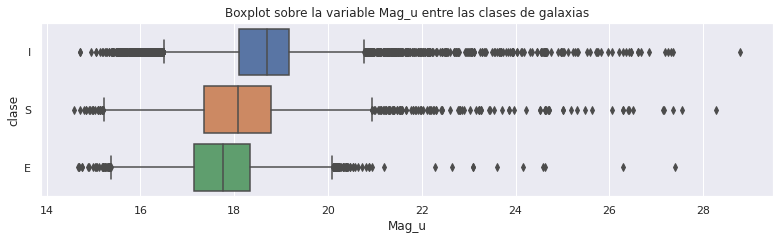

In [270]:
seaborn.boxplot(x="Mag_u", y="clase", data=galaxias_filtered)
plt.title("Boxplot sobre la variable Mag_u entre las clases de galaxias")
plt.show()

In [220]:
galaxias_filtered_irregular = galaxias_filtered[galaxias_filtered.clase == "I"]
galaxias_filtered_eliptica = galaxias_filtered[galaxias_filtered.clase == "E"]
galaxias_filtered_espiral = galaxias_filtered[galaxias_filtered.clase == "S"]

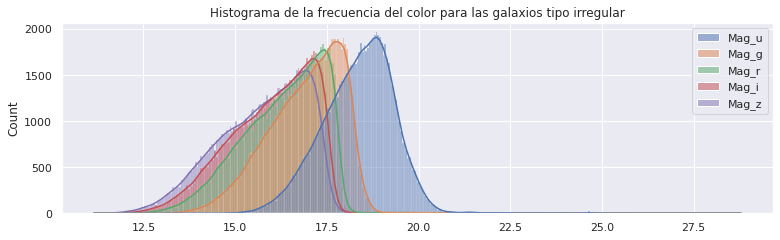

In [246]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_filtered[['Mag_u','Mag_g','Mag_r','Mag_i','Mag_z']], kde=True)
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color para las galaxios tipo irregular")
plt.show()

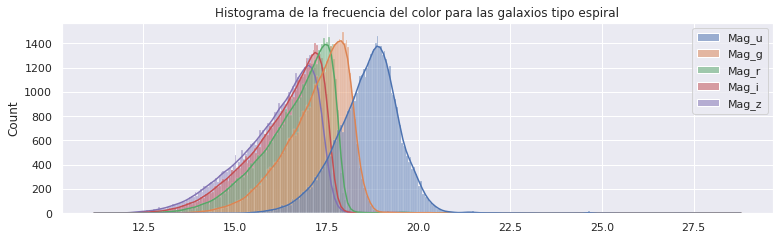

In [221]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_filtered_irregular[['Mag_u','Mag_g','Mag_r','Mag_i','Mag_z']], kde=True)
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color para las galaxios tipo irregular")
plt.show()

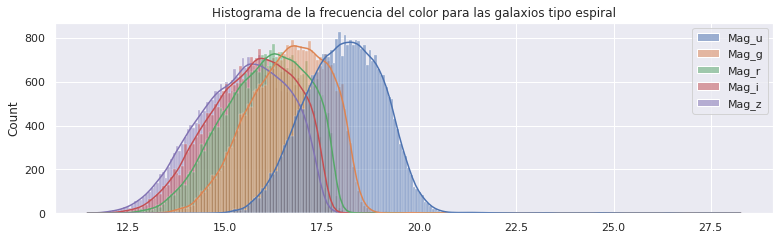

In [172]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_filtered_espiral[['Mag_u','Mag_g','Mag_r','Mag_i','Mag_z']], kde=True)
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color para las galaxios tipo espiral")
plt.show()

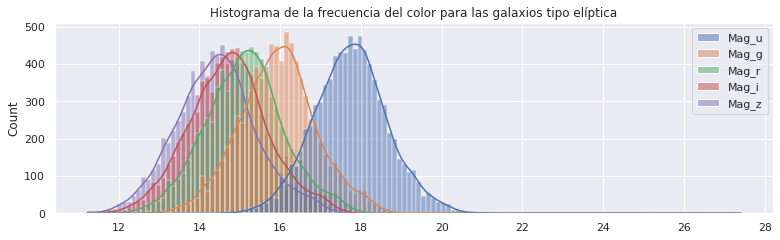

In [222]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_filtered_eliptica[['Mag_u','Mag_g','Mag_r','Mag_i','Mag_z']], kde=True)
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color para las galaxios tipo elíptica")
plt.show()

In [268]:
columnas_std = ["z_Mag_u","z_Mag_g","z_Mag_r","z_Mag_i","z_Mag_z"]

In [256]:
# Z = (x - media) / (desvio / raiz de N)
galaxias_std = galaxias_filtered.copy()
galaxias_std['z_Mag_u'] = calcular_estadistico(galaxias_filtered,'Mag_u')
galaxias_std['z_Mag_g'] = calcular_estadistico(galaxias_filtered,'Mag_g')
galaxias_std['z_Mag_r'] = calcular_estadistico(galaxias_filtered,'Mag_r')
galaxias_std['z_Mag_i'] = calcular_estadistico(galaxias_filtered,'Mag_i')
galaxias_std['z_Mag_z'] = calcular_estadistico(galaxias_filtered,'Mag_z')

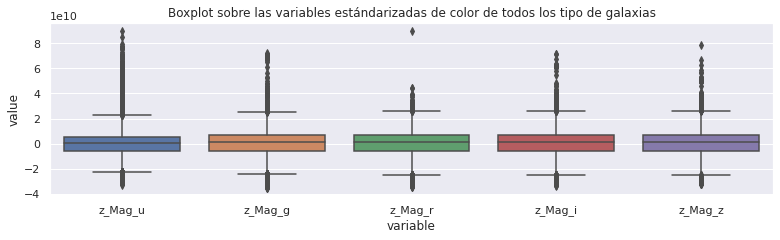

In [258]:
df_filtered_std = pd.DataFrame(data=galaxias_std, columns=columnas_std)
seaborn.boxplot(x="variable", y="value", data=pd.melt(df_filtered_std))
plt.title("Boxplot sobre las variables estándarizadas de color de todos los tipo de galaxias")
plt.show()

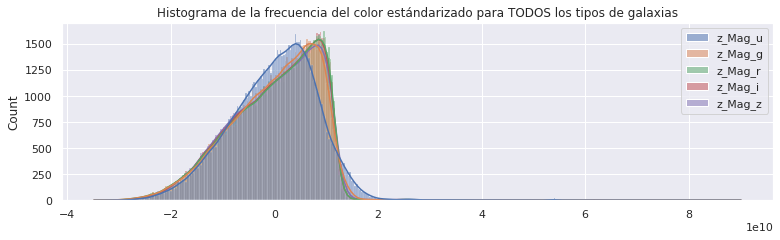

In [290]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_std[columnas_std], kde=True)
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color estándarizado para TODOS los tipos de galaxias")
plt.show()

Al ver el desvío de +-2 podemos decir que hay una gran dispersión de datos, está sesgado hacia la derecha. En el 0 están los 50% de los valores. Para mas de 50% de los valores hay un desvío muy grande que supera el 8 (de la x)

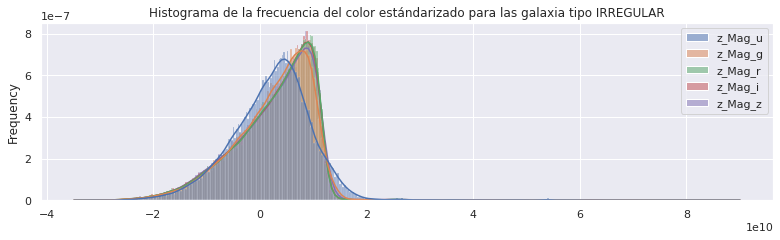

In [264]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_std[galaxias_std.clase == "I"][columnas_std], kde=True, stat="frequency")
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color estándarizado para las galaxia tipo IRREGULAR")
plt.show()

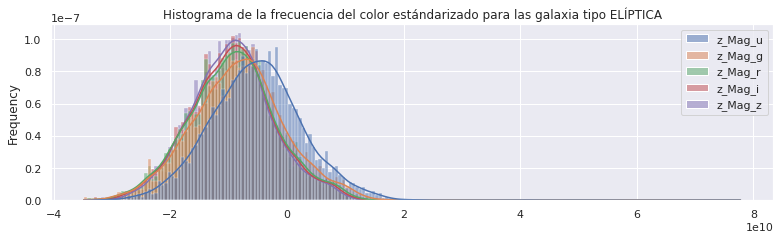

In [265]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_std[galaxias_std.clase == "E"][columnas_std], kde=True, stat="frequency")
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color estándarizado para las galaxia tipo ELÍPTICA")
plt.show()

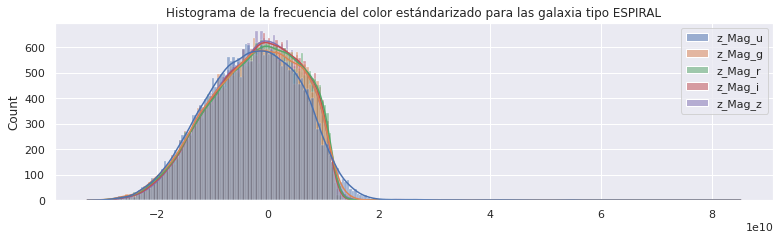

In [292]:
plt.rcParams["figure.figsize"] = [11.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data = galaxias_std[galaxias_std.clase == "S"][columnas_std], kde=True)
#ax.lines[0].remove()
plt.title("Histograma de la frecuencia del color estándarizado para las galaxia tipo ESPIRAL")
plt.show()

#### Análisis variable de posición angular ("ra","dec")

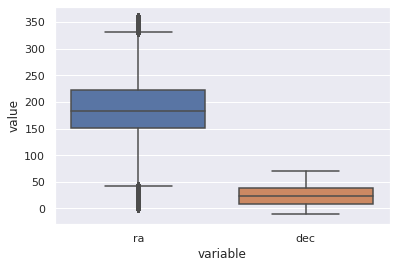

In [84]:
df = pd.DataFrame(data=data, columns=["ra", "dec"])
seaborn.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [73]:
def boxplot_column_clase(data,column):
    seaborn.boxplot(data=data, x="clase", y=column)
    plt.show()

---

Use histogramas y boxplots para visualizar intervalos de confianza, mediana, media, intercuartiles y *outliers* de la posición **z** y del tamaño **R** para algun tipo morfologíco.

Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

# Valores característicos 

Mostrar los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

# Distribución Normal

- Grafique la distribución Normal variando sus estadísticos. Realice una breve descripción de los cambios que nota en estos.

Algunos valores físicos de las galaxias no pueden ser determinados. Muchas veces la alternativa al usual *NaN* es llenar la celda del valor faltante con cero o con números de valor muy grande o muy chico discordantes a los valores usuales que toma la cantidad física. 

Se puede optar por ignorar dicho número o remplazarlo por cero, el valor medio o eliminarlo en el caso que el dataset sea de una gran dimensión.

El caso anteriormente se observa con la variable *color* donde dos de las galaxias no tienen su color determinado. 

- Dele solución 
- Ajuste la distribución de la variable **color** con el tamaño del bin=0.1 a una Normal usando *sns.distplot* 
- Explique que observa

# Probabilidad

- Calcule la Probabilidad marginal de cada tipo morfologico y grafiquela.

- Calcule la probabilida conjunta las galaxias de clase = E con el color  mayor a -2.1

- Analice la correlación entre dos de las variables a través de chi-cuadrado. Muestre esta correlación a través de mapas de calor.

# Conclusiones: